# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

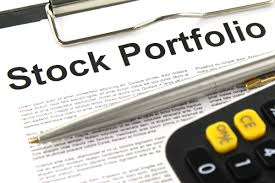

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.

1. Mostrar el DataFrame de los precios diarios (2 puntos).
2. Graficar los precios (3 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).
4. Graficar los rendimientos (3 puntos).

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [71]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [72]:
names = ['^GSPC', 'MSFT', 'WBA', 'TSLA']
start_date = '2015-01-01'
end_date='2019-12-31'
closes=get_adj_closes(names,start_date)
closes.head()


Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,41.647892,43.862000,66.025406,2058.199951
2015-01-05,41.264908,42.018002,64.722275,2020.579956
2015-01-06,40.659245,42.256001,64.887360,2002.609985
2015-01-07,41.175831,42.189999,66.546669,2025.900024
2015-01-08,42.387146,42.124001,67.372002,2062.139893


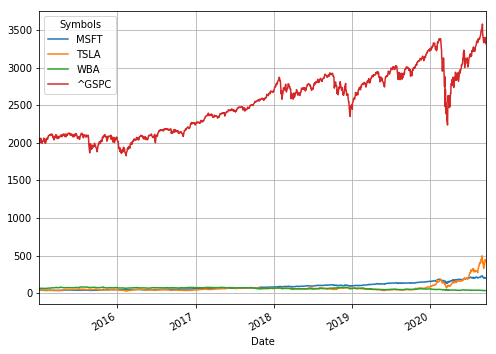

In [73]:
closes.plot(figsize=(8,6),grid=True);

In [74]:
closes.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,41.647892,43.862000,66.025406,2058.199951
2015-01-05,41.264908,42.018002,64.722275,2020.579956
2015-01-06,40.659245,42.256001,64.887360,2002.609985
2015-01-07,41.175831,42.189999,66.546669,2025.900024
2015-01-08,42.387146,42.124001,67.372002,2062.139893


In [75]:
closes.shift().head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,41.647892,43.862000,66.025406,2058.199951
2015-01-06,41.264908,42.018002,64.722275,2020.579956
2015-01-07,40.659245,42.256001,64.887360,2002.609985
2015-01-08,41.175831,42.189999,66.546669,2025.900024


In [76]:
ret = ((closes - closes.shift()) / closes.shift()).dropna()
ret.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-05,-0.009196,-0.042041,-0.019737,-0.018278
2015-01-06,-0.014677,0.005664,0.002551,-0.008893
2015-01-07,0.012705,-0.001562,0.025572,0.011630
2015-01-08,0.029418,-0.001564,0.012402,0.017888
2015-01-09,-0.008405,-0.018802,-0.024243,-0.008404


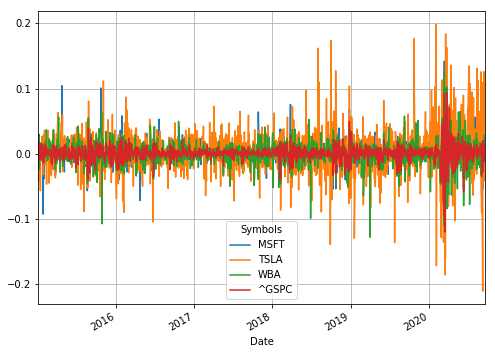

In [77]:
ret.plot(figsize=(8,6),grid=True);

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [78]:
ret2 = ret.drop(['^GSPC'], axis=1)
mean_ret = ret2.mean()
vol = ret2.std()
ret_summary = pd.DataFrame({'Mean': mean_ret, 'Vol': vol})
ret_summary

,Mean,Vol
Symbols,,
MSFT,0.001247,0.017568
TSLA,0.002203,0.034563
WBA,-0.000235,0.018344


In [79]:
ret_summary_anual = pd.DataFrame({'Mean': mean_ret*252,
                                  'Vol': vol* np.sqrt(252)
                                  })
ret_summary_anual

,Mean,Vol
Symbols,,
MSFT,0.314292,0.278886
TSLA,0.555279,0.548673
WBA,-0.059120,0.291201


In [80]:
cov = ret2[['MSFT', 'WBA', 'TSLA']]. cov()
cov

Symbols,MSFT,WBA,TSLA
Symbols,,,
MSFT,0.000309,0.000135,0.000242
WBA,0.000135,0.000337,0.000118
TSLA,0.000242,0.000118,0.001195


In [81]:
corr = ret2[['MSFT', 'WBA', 'TSLA']].corr()
corr

Symbols,MSFT,WBA,TSLA
Symbols,,,
MSFT,1.000000,0.419820,0.398006
WBA,0.419820,1.000000,0.186147
TSLA,0.398006,0.186147,1.000000


## 3. Rentimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [82]:
Port_1=(ret2['MSFT']*(1/3)+ret2['WBA']*(1/3)+ret2['TSLA']*(1/3))
Er1=Port_1.mean()*252
s1=Port_1.std()*np.sqrt(252)
Port_2=(ret2['MSFT']*(.30)+ret2['WBA']*(.20)+ret2['TSLA']*(.50))
Er2=Port_2.mean()*252
s2=Port_2.std()*np.sqrt(252)
Port_3=(ret2['MSFT']*(.50)+ret2['WBA']*(.30)+ret2['TSLA']*(.20))
Er3=Port_3.mean()*252
s3=Port_3.std()*np.sqrt(252)
Port_4=(ret2['MSFT']*(.20)+ret2['WBA']*(.50)+ret2['TSLA']*(.30))
Er4=Port_4.mean()*252
s4=Port_4.std()*np.sqrt(252)

In [83]:
tabla1 = pd.DataFrame(columns=['Rendimiento', 'Volatilidad'], index=['Port_1', 'Port_2', 'Port_3', 'Port_4'])
tabla1.index.name = 'Portafolio'
tabla1['Rendimiento']=[Er1, Er2, Er3, Er4]
tabla1['Volatilidad']=[s1, s2, s3, s4]
tabla1

,Rendimiento,Volatilidad
Portafolio,,
Port_1,0.270150,0.281483
Port_2,0.360103,0.337583
Port_3,0.250466,0.255138
Port_4,0.199882,0.272862


In [84]:
M = pd.DataFrame.transpose(ret_summary_a.drop(['Vol anual'], axis=1))
S = pd.DataFrame.transpose(ret_summary_a.drop(['Rend anual'], axis=1))


In [85]:
Port_1_m = (1/3)* M['MSFT'] + (1/3) * M['WBA']  + (1/3) * M['TSLA']
Port_2_m = 0.3* M['MSFT'] + 0.2* M['WBA']  + 0.5* M['TSLA']
Port_3_m = 0.5* M['MSFT'] + 0.3* M['WBA']  + 0.2* M['TSLA']
Port_4_m = 0.2* M['MSFT'] + 0.5* M['WBA']  + 0.3* M['TSLA']

In [86]:
wP1 = np.array([1/3, 1/3, 1/3])
sP1 = ((wP1.dot(cov).dot(wP1))**0.5)*np.sqrt(252)
wP2 = np.array([0.3, 0.2, 0.5])
sP2 = ((wP2.dot(cov).dot(wP2))**0.5)*np.sqrt(252)
wP3 = np.array([0.5, 0.3, 0.2])
sP3 = ((wP3.dot(cov).dot(wP3))**0.5)*np.sqrt(252)
wP4 = np.array([0.2, 0.5, 0.3])
sP4 = ((wP4.dot(cov).dot(wP4))**0.5)*np.sqrt(252)

In [87]:
tabla2 = pd.DataFrame(columns=['Mean_A','Vol_A'], index=['Port_1','Port_2','Port_3','Port_4'])
tabla2.index.name = 'Portafolio'
tabla2['Mean_A']=np.array([Port_1_m,Port_2_m,Port_3_m,Port_4_m])
tabla2['Vol_A']=np.array([sP1,sP2,sP3,sP4])
tabla2

,Mean_A,Vol_A
Portafolio,,
Port_1,0.270150,0.281483
Port_2,0.360103,0.337583
Port_3,0.250466,0.255138
Port_4,0.199882,0.272862


In [88]:
print(tabla1) 
print(tabla2)

            Rendimiento  Volatilidad
Portafolio                          
Port_1         0.270150     0.281483
Port_2         0.360103     0.337583
Port_3         0.250466     0.255138
Port_4         0.199882     0.272862
              Mean_A     Vol_A
Portafolio                    
Port_1      0.270150  0.281483
Port_2      0.360103  0.337583
Port_3      0.250466  0.255138
Port_4      0.199882  0.272862


Las dos tablas que representan los modelos son iguales

## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).
2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)

In [89]:
mean_g = ret.mean()
volg = ret.std()
anual_g = pd.DataFrame({'Mean': mean_g*252,
                                  'Vol': volg* np.sqrt(252)
                                  })
MG = pd.DataFrame.transpose(anual_g.drop(['Vol'], axis=1))
VG = pd.DataFrame.transpose(anual_g.drop(['Mean'], axis=1))
G_m = MG['^GSPC']
M_m = M['MSFT']
W_m = M['WBA']
T_m = M['TSLA']
G_s = VG['^GSPC'] 
M_s = S['MSFT'] 
W_s = S['WBA']
T_s = S['TSLA']


In [90]:
tabla3 = pd.DataFrame(columns=['Mean_A','Vol_A'], index=['Port_1','Port_2','Port_3','Port_4','^GSPC', 'MSFT','WBA','TSLA'])
tabla3['Mean_A']=np.array([Port_1_m,Port_2_m,Port_3_m,Port_4_m,G_m.values,M_m.values,W_m.values,T_m.values])
tabla3['Vol_A']=np.array([sP1,sP2,sP3,sP4,G_s.values[0],M_s.values[0],W_s.values[0],T_s.values[0]])
tabla3

,Mean_A,Vol_A
Port_1,0.270150,0.281483
Port_2,0.360103,0.337583
Port_3,0.250466,0.255138
Port_4,0.199882,0.272862
^GSPC,0.101453,0.187489
MSFT,0.314292,0.278886
WBA,-0.059120,0.291201
TSLA,0.555279,0.548673


Text(0,0.5,'Rendimiento esperado $E[r]$')

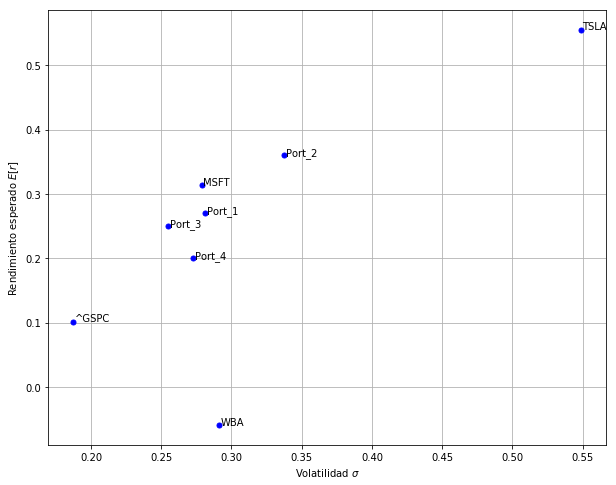

In [91]:
plt.figure(figsize=(10, 8));
for i in range(len(tabla3)):
    plt.plot(tabla3.iloc[i, 1], tabla3.iloc[i, 0], 'ob', ms=5)
    plt.text(tabla3.iloc[i, 1]+0.001, tabla3.iloc[i, 0], tabla3.index[i])
    
plt.grid()
plt.xlabel("Volatilidad $\sigma$")
plt.ylabel("Rendimiento esperado $E[r]$")

## CONCLUSIÓN
Con ayuda del gráfico podemos analizar la posicion de los puntos y podemos observar que hay un comportamiento mayormente proporcional entre el rendimiento y la volatilidad de los portafolios que en los activos por si solos, esto quiere decir que al crear un portafolio el riesgo que tiene cada activo individual se reduce ya que los estamos combinando (diversificando). 
Regresando al ejemplo particular se muestra que el activo con mayor volatilidad es Tesla,pero tambien tiene el mayor rendimiento, es por eso que el portafolio 2 que contiene el 50% de este activo es el que presenta mayor volatilidad y rendimiento, sin embargo, el riesgo es mucho menor en el portafolio que el activo solo. Tambien se puede observar que el portafolio 1 y 4 tienen una volatilidad similar aunque el 1 tiene mayor rendimiento.
Asi podemos seguir analizando y observar como se compensan los riesgos y rendimientos de los activos al crear un portafolio, lo que nos ayudará a encontrar la mejor opción. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>